# Basic Assessment

Data Source **https://www.kaggle.com/datasets/nelgiriyewithana/global-weather-repository/data**

In [186]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform

In [187]:
# read the csv data 
data = pd.read_csv('data/GlobalWeatherRepository.csv')
data.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


**Data Cleaning & Preprocessing**


In [188]:
# find count of columns datatypes
data.dtypes.value_counts()

float64    23
object     11
int64       7
Name: count, dtype: int64

In [189]:
data.dtypes

country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64
uv_index                        float64


In [190]:
# check for missing values
data.isnull().sum()

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [191]:
# describe the data statistics for numerical columns
data.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,48331.000000,48331.000000,4.833100e+04,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,...,48331.000000,48331.00000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000,48331.000000
mean,19.141781,22.206838,1.726618e+09,23.092334,73.567648,8.288184,13.342586,171.047692,1013.730939,29.934866,...,19.295682,515.46358,62.784943,13.943798,10.539274,23.413230,46.054104,1.645817,2.500403,49.742546
std,24.481570,65.787726,6.262044e+06,9.123988,16.423102,9.908067,15.944257,103.217277,7.062986,0.208466,...,17.628332,994.55429,37.850552,25.679076,52.023512,45.757107,140.142819,0.958125,2.462803,35.068749
min,-41.300000,-175.200000,1.715849e+09,-24.800000,-12.600000,2.200000,3.600000,1.000000,971.000000,28.670000,...,3.600000,-9999.00000,0.000000,0.000000,-9999.000000,0.185000,0.185000,1.000000,1.000000,0.000000
25%,3.750000,-6.250000,1.721134e+09,18.300000,64.900000,4.000000,6.500000,82.500000,1010.000000,29.830000,...,10.800000,218.30000,37.000000,0.800000,0.700000,4.700000,7.600000,1.000000,1.000000,15.000000
50%,17.250000,23.320000,1.726656e+09,25.300000,77.500000,6.900000,11.200000,164.000000,1013.000000,29.910000,...,17.000000,310.40000,59.000000,2.960000,2.035000,11.840000,18.500000,1.000000,1.000000,50.000000
75%,40.400000,50.580000,1.732007e+09,29.000000,84.200000,11.600000,18.700000,259.000000,1017.000000,30.030000,...,25.700000,474.00000,83.700000,14.100000,7.770000,26.150000,41.810000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.737373e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,1080.000000,31.890000,...,2970.400000,38879.39800,480.700000,427.700000,521.330000,1614.100000,5858.020000,6.000000,10.000000,100.000000


In [192]:
# find the count of outliers in each numerical column below 25th percentile and above 75th percentile
results = []

# Iterate through all numerical columns in the dataset
for column in data.select_dtypes(include=['number']).columns:
    # Calculate the 25th and 75th percentiles
    q25 = data[column].quantile(0.25)
    q75 = data[column].quantile(0.75)

    # Identify outliers
    outliers_above_75 = (data[column] > q75).sum()
    outliers_below_25 = (data[column] < q25).sum()

    # Append results for the current column
    results.append({
        'column_name': column,
        'below 25 percentile': outliers_below_25,
        'number of outliers > 75 percentile': outliers_above_75
    })

outliers_df = pd.DataFrame(results)

outliers_df

,column_name,below 25 percentile,number of outliers > 75 percentile
0,latitude,11935,11954
1,longitude,12080,11986
2,last_updated_epoch,11989,12052
3,temperature_celsius,12029,11717
4,temperature_fahrenheit,12029,11739
5,wind_mph,11595,11906
6,wind_kph,11595,11906
7,wind_degree,12083,12023
8,pressure_mb,10932,11269
9,pressure_in,11713,11615


**Exploratory Data Analysis (EDA)**

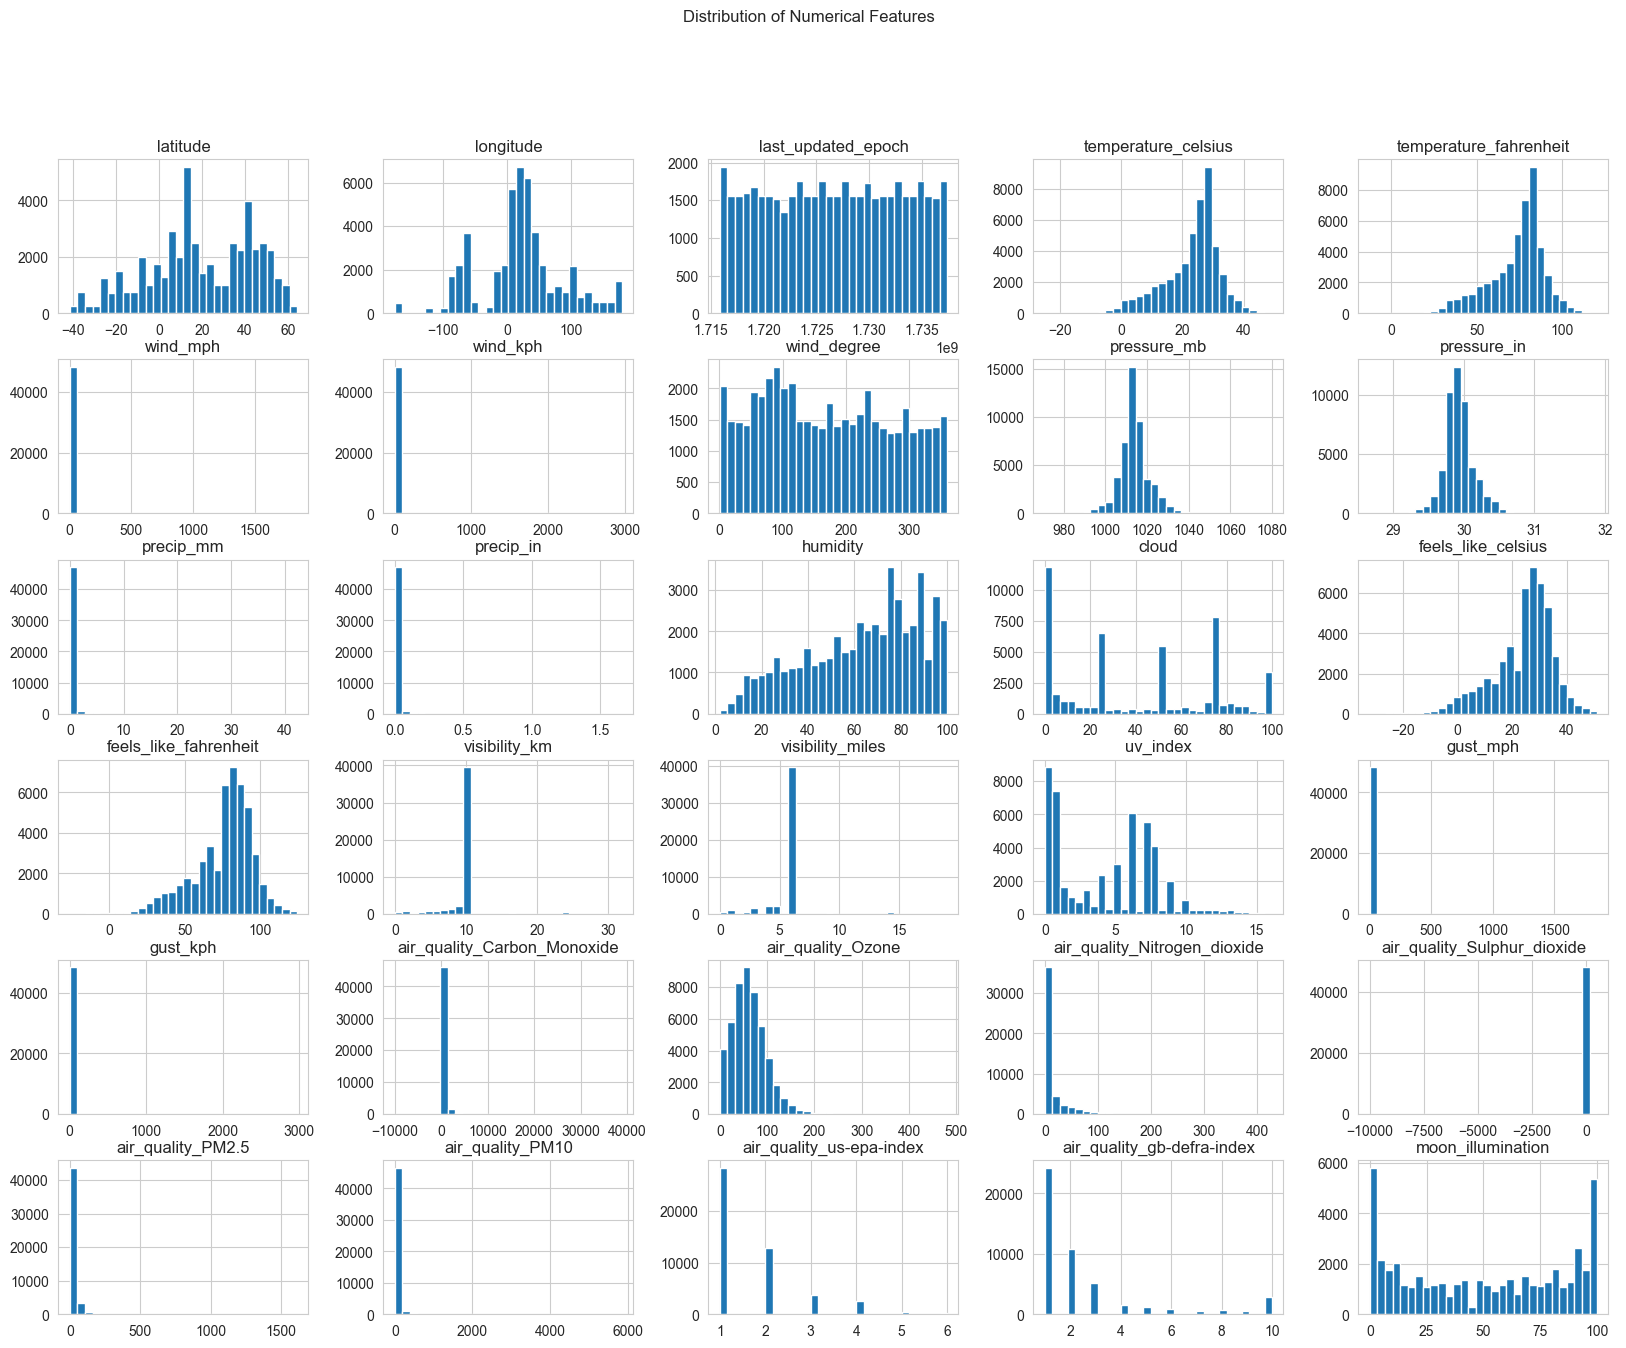

In [193]:
# Visualize the distribution of numerical features
data.hist(bins=30, figsize=(20, 15))
plt.suptitle('Distribution of Numerical Features')
plt.show()

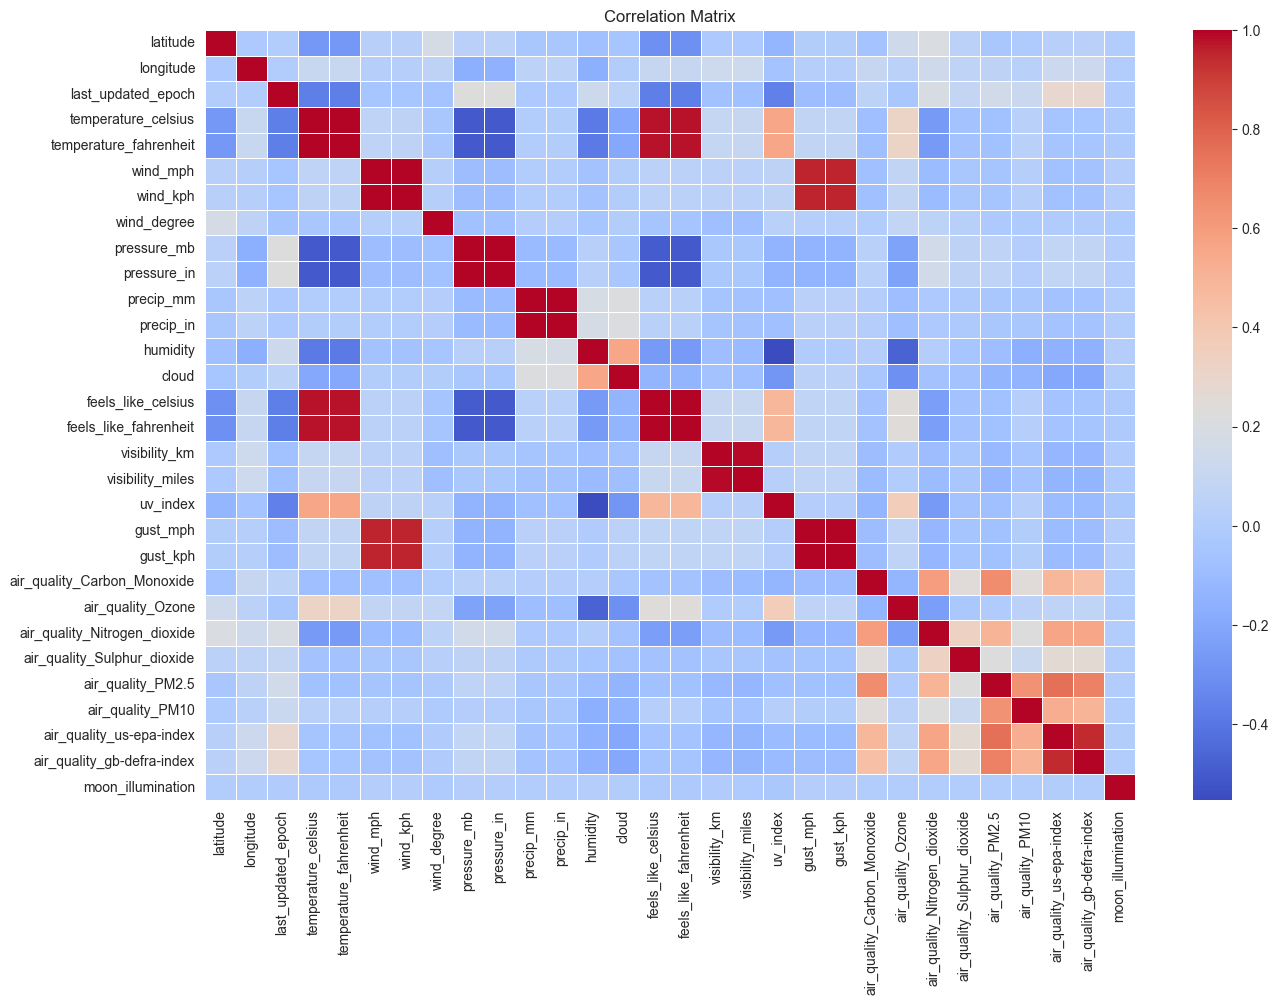

In [194]:
# Visualize correlations between numerical features using a heatmap
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix for numeric columns
correlation_matrix = numeric_data.corr()

# Plot the heatmap without annotations
plt.figure(figsize=(15, 10))
# annot=False to remove the correlation values from the plot to make it more readable
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [195]:
from utils.map_helper import  create_temperature_map
create_temperature_map(data)

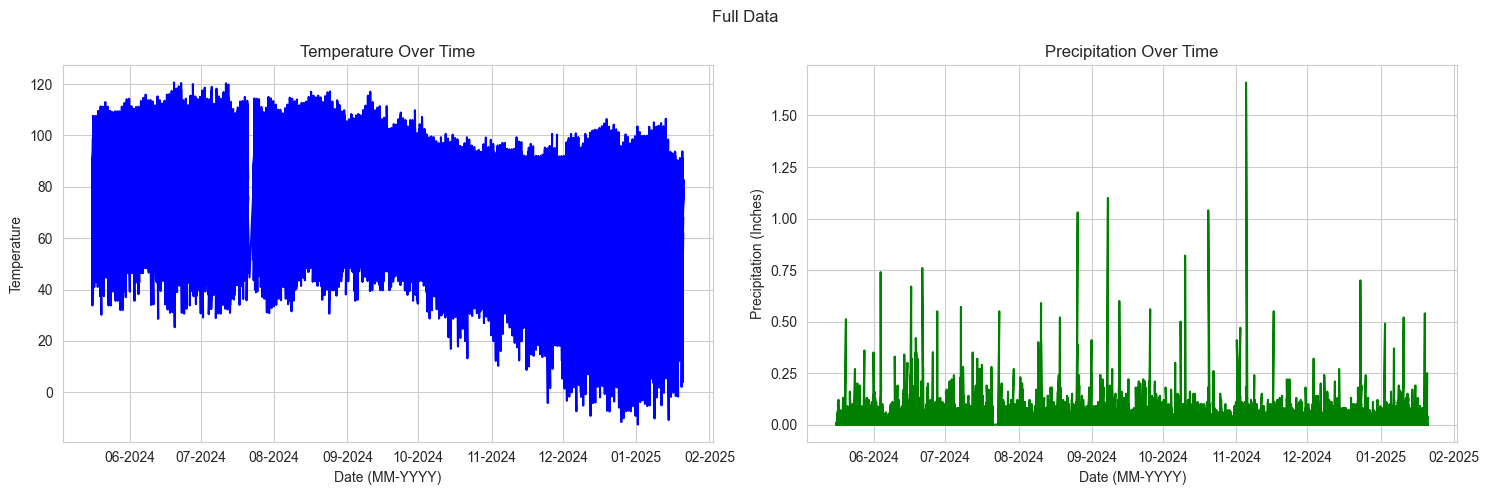

In [196]:
from utils.plot_time_series import plot_time_series
# Convert 'last_update' to datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
plot_time_series(data,'Full Data')

In [197]:
# analysis on non-numerical columns (10 columns)
data.select_dtypes(include=['object']).columns

Index(['country', 'location_name', 'timezone', 'condition_text',
       'wind_direction', 'sunrise', 'sunset', 'moonrise', 'moonset',
       'moon_phase'],
      dtype='object')

In [198]:
# get the count of readings per country 
data['country'].value_counts()

country
Bulgaria                            530
Indonesia                           499
Madagascar                          496
Iran                                496
Sudan                               496
                                   ... 
Kosovo                                1
Libya                                 1
Lao People's Democratic Republic      1
Colombia                              1
Jemen                                 1
Name: count, Length: 210, dtype: int64

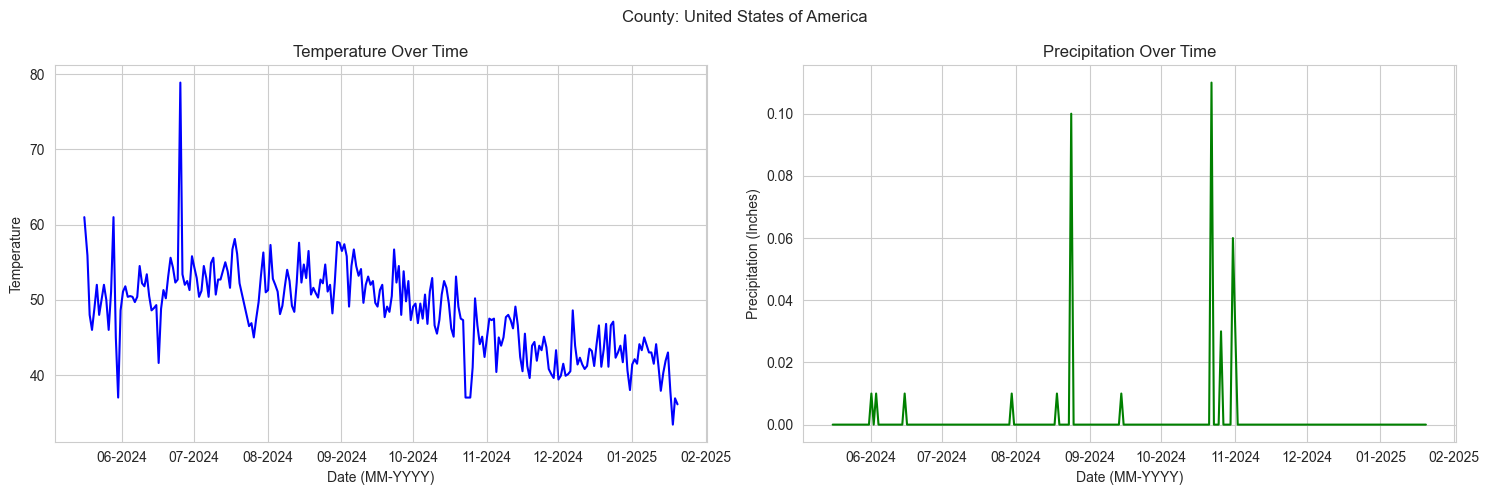

In [199]:
# Plot the time series for United States
# Filter the data for United States
us_data = data[data['country'] == 'United States of America']
plot_time_series(us_data, 'County: United States of America')

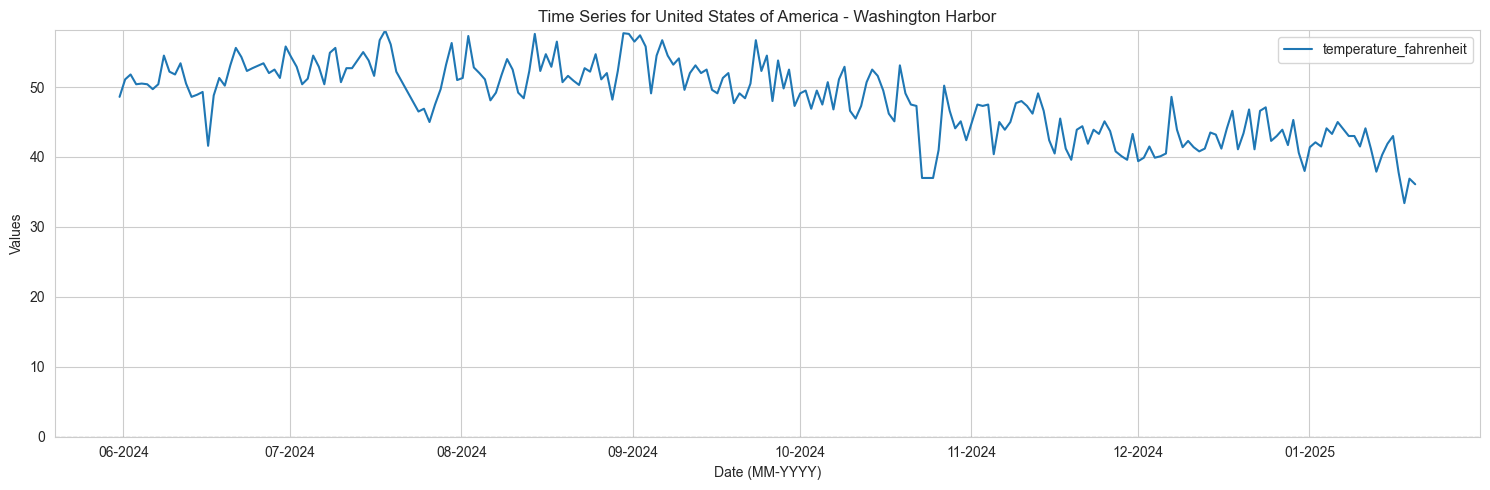

In [200]:
# plot the time series for United States of America, Washington Harbor for temperature_fahrenheit
from utils.plot_time_series import plot_time_series_single
# Convert 'last_update' to datetime format
data['last_updated'] = pd.to_datetime(data['last_updated'])
# plot_time_series_single(data,'Mongolia', 'Ulaanbaatar', ['temperature_fahrenheit'])
plot_time_series_single(data,'United States of America', 'Washington Harbor', ['temperature_fahrenheit'])

**Model Building**

In [201]:
from utils.plot_time_series import filter_data_country_location
dataclass_transform = filter_data_country_location(data, 'United States of America', 'Washington Harbor')
y = dataclass_transform['temperature_fahrenheit']
x = dataclass_transform['last_updated']

/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary

                                 SARIMAX Results                                  
Dep. Variable:     temperature_fahrenheit   No. Observations:                  181
Model:                     ARIMA(2, 1, 2)   Log Likelihood                -441.460
Date:                    Mon, 20 Jan 2025   AIC                            892.921
Time:                            21:10:42   BIC                            908.885
Sample:                                 0   HQIC                           899.394
                                    - 181                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4882      0.164     -2.975      0.003      -0.810      -0.167
ar.L2          0.3277      0.124      2.645      0.008       0.085       0.571
ma.L1          0.024

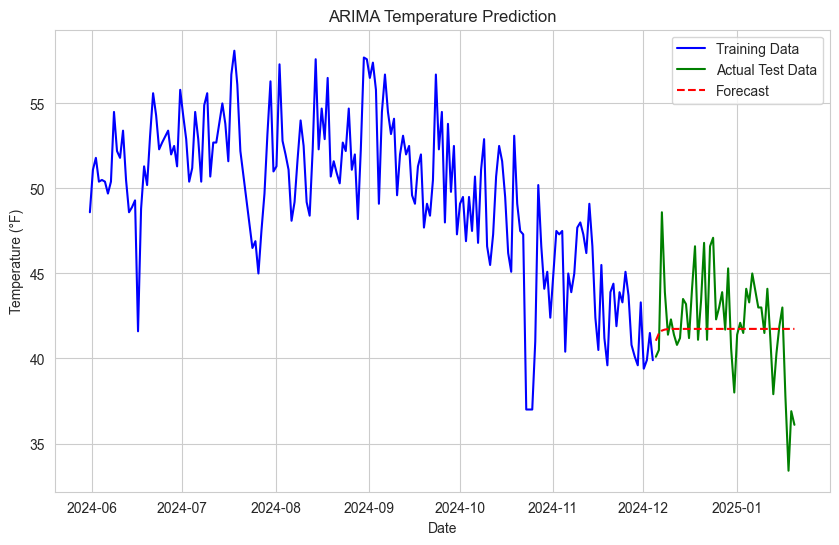

Mean Squared Error: 8.5725


In [202]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure 'last_updated' is sorted and set it as the index
dataclass_transform = dataclass_transform.sort_values('last_updated')
dataclass_transform.set_index('last_updated', inplace=True)

# Extract temperature time series
temperature_series = dataclass_transform['temperature_fahrenheit']

# Split the data into training and testing sets
train_size = int(len(temperature_series) * 0.8)
train_data = temperature_series[:train_size]
test_data = temperature_series[train_size:]

# Fit the ARIMA model
order = (2, 1, 2)  # (p, d, q) values; can be tuned
model = ARIMA(train_data, order=order)
model_fitted = model.fit()

# Print model summary
print(model_fitted.summary())

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fitted.forecast(steps=forecast_steps)
forecast_index = test_data.index

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Temperature Prediction')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error: {mse:.4f}')


In [209]:
# !pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=890.305, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=932.440, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=922.697, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=909.828, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=930.482, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=891.774, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=891.891, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=892.429, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=916.797, Time=0.03 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=892.852, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=890.386, Time=0.02 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.656 seconds
Optimal ARIMA order: (1, 1, 1)


/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/miniconda3/envs/Weather-Trend-Forecasting/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported inde

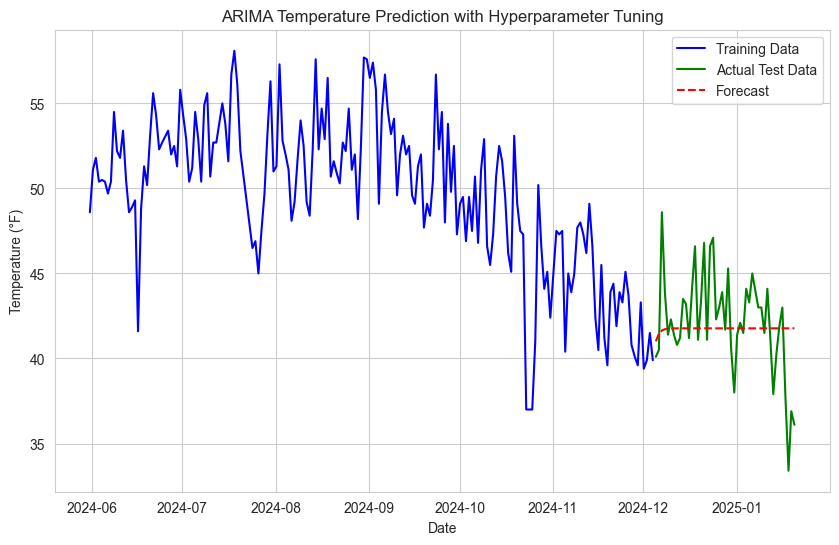

Mean Squared Error: 8.5519


In [210]:
from pmdarima import auto_arima
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Ensure 'last_updated' is sorted and set it as the index
dataclass_transform = dataclass_transform.sort_values('last_updated')
dataclass_transform.set_index('last_updated', inplace=True)

# Extract temperature time series
temperature_series = dataclass_transform['temperature_fahrenheit']

# Split the data into training and testing sets
train_size = int(len(temperature_series) * 0.8)
train_data = temperature_series[:train_size]
test_data = temperature_series[train_size:]

# Perform hyperparameter tuning using auto_arima
auto_model = auto_arima(
    train_data,
    start_p=1, max_p=5,  # Range for p
    start_q=1, max_q=5,  # Range for q
    d=None,  # Automatically determine differencing
    seasonal=False,  # Assume no seasonality
    stepwise=True,  # Perform stepwise search
    trace=True  # Show the progress
)

# Print the optimal order
print(f"Optimal ARIMA order: {auto_model.order}")

# Fit the ARIMA model with optimal order
optimal_order = auto_model.order
model = ARIMA(train_data, order=optimal_order)
model_fitted = model.fit()

# Forecast future values
forecast_steps = len(test_data)
forecast = model_fitted.forecast(steps=forecast_steps)
forecast_index = test_data.index

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data, label='Actual Test Data', color='green')
plt.plot(forecast_index, forecast, label='Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Temperature Prediction with Hyperparameter Tuning')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error: {mse:.4f}')


Epoch [10/300], Loss: 0.1354
Epoch [20/300], Loss: 0.0632
Epoch [30/300], Loss: 0.0422
Epoch [40/300], Loss: 0.0331
Epoch [50/300], Loss: 0.0328
Epoch [60/300], Loss: 0.0323
Epoch [70/300], Loss: 0.0313
Epoch [80/300], Loss: 0.0304
Epoch [90/300], Loss: 0.0293
Epoch [100/300], Loss: 0.0281
Epoch [110/300], Loss: 0.0267
Epoch [120/300], Loss: 0.0248
Epoch [130/300], Loss: 0.0224
Epoch [140/300], Loss: 0.0197
Epoch [150/300], Loss: 0.0185
Epoch [160/300], Loss: 0.0185
Epoch [170/300], Loss: 0.0182
Epoch [180/300], Loss: 0.0181
Epoch [190/300], Loss: 0.0180
Epoch [200/300], Loss: 0.0179
Epoch [210/300], Loss: 0.0178
Epoch [220/300], Loss: 0.0177
Epoch [230/300], Loss: 0.0176
Epoch [240/300], Loss: 0.0175
Epoch [250/300], Loss: 0.0174
Epoch [260/300], Loss: 0.0172
Epoch [270/300], Loss: 0.0171
Epoch [280/300], Loss: 0.0170
Epoch [290/300], Loss: 0.0169
Epoch [300/300], Loss: 0.0168


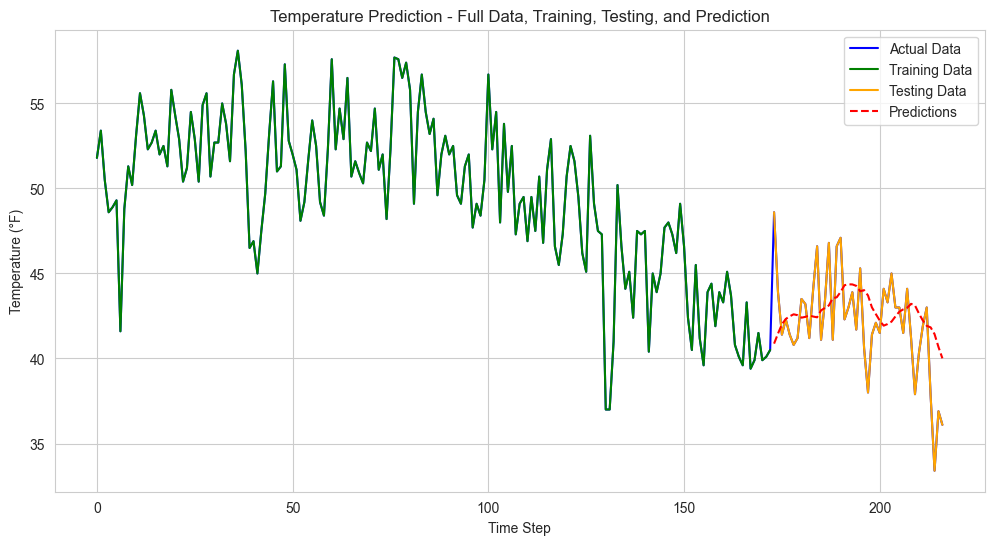

In [205]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

# Filter and prepare data
dataclass_transform = filter_data_country_location(data, 'United States of America', 'Washington Harbor')
y = dataclass_transform['temperature_fahrenheit'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y)

# Create sequences for LSTM
sequence_length = 10  # Number of time steps to look back
x_sequences, y_sequences = [], []
for i in range(len(y_scaled) - sequence_length):
    x_sequences.append(y_scaled[i:i + sequence_length])
    y_sequences.append(y_scaled[i + sequence_length])

x_sequences = np.array(x_sequences)
y_sequences = np.array(y_sequences)

# Convert to PyTorch tensors
x_sequences = torch.tensor(x_sequences, dtype=torch.float32)
y_sequences = torch.tensor(y_sequences, dtype=torch.float32)

# Split into training and testing sets
train_size = int(0.8 * len(x_sequences))
x_train, x_test = x_sequences[:train_size], x_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

# Define the LSTM model
class TemperatureLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(TemperatureLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Initial hidden state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)  # Initial cell state
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Output of the last time step
        return out

# Hyperparameters
input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2
learning_rate = 0.001
num_epochs = 300

# Initialize the model, loss function, and optimizer
model = TemperatureLSTM(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
model.train()
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

# Inverse transform predictions and ground truth to original scale
y_pred = scaler.inverse_transform(y_pred.numpy())
y_train_original = scaler.inverse_transform(y_train.numpy())
y_test_original = scaler.inverse_transform(y_test.numpy())
y_full = np.concatenate([y_train_original, y_test_original])  # Full dataset

# Combine predictions for plotting
y_combined_pred = np.concatenate([y_train_original, y_pred])  # Predictions appended to train

# Plot full train, test, and prediction
plt.figure(figsize=(12, 6))
plt.plot(y_full, label='Actual Data', color='blue')
plt.plot(range(len(y_train_original)), y_train_original, label='Training Data', color='green')
plt.plot(range(len(y_train_original), len(y_full)), y_test_original, label='Testing Data', color='orange')
plt.plot(range(len(y_train_original), len(y_full)), y_pred, label='Predictions', color='red', linestyle='dashed')
plt.legend()
plt.title('Temperature Prediction - Full Data, Training, Testing, and Prediction')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.show()


Model Performance Metrics:
Mean Squared Error (MSE): 8.3239
Root Mean Squared Error (RMSE): 2.8851
Mean Absolute Error (MAE): 2.2392
R² Score: 0.0409


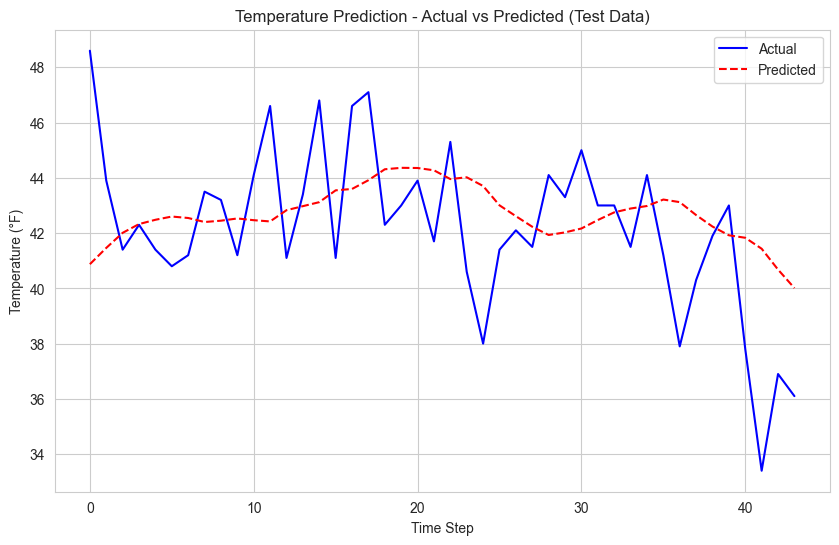

In [207]:
# evaluate model performance using different metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

# Inverse transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred.numpy())
y_test_original = scaler.inverse_transform(y_test.numpy())

# Calculate evaluation metrics
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

# Print metrics
print(f"Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Plot predictions vs actuals for visual evaluation
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red', linestyle='dashed')
plt.legend()
plt.title('Temperature Prediction - Actual vs Predicted (Test Data)')
plt.xlabel('Time Step')
plt.ylabel('Temperature (°F)')
plt.show()